In [5]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for polarity and subjectivity
from textblob import TextBlob

In [6]:
data = pd.read_pickle('corpus.pkl')

In [7]:
data

,lyrics
bob_dylan,"'Twas a dark day in Dallas, November '63\nA da..."
david_bowie,Mmm num ba de\nDum bum ba be\nDoo buh dum ba b...
janis_joplin,"Busted flat in Baton Rouge, waiting for a trai..."
john_prine,She don't like her eggs all runny\nShe thinks ...
leonard_cohen,Now I've heard there was a secret chord\nThat ...
linda_ronstadt,I feel so bad I got a worried mind\nI'm so lon...
mark_knopfler,"I'm going to San Bernardino, ring-a-ding-ding\..."
neil_young,"Old man, look at my life\nI'm a lot like you w..."
stevie_nicks,Just like the white winged dove\nSings a song\...
the_band,I pulled in to Nazareth\nWas feeling 'bout hal...


In [8]:
# lambda functions to find polarity and subjectivity for the ENTIRE CORPUS of each musician
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)

In [9]:
data

,lyrics,polarity,subjectivity
bob_dylan,"'Twas a dark day in Dallas, November '63\nA da...",0.052527,0.470225
david_bowie,Mmm num ba de\nDum bum ba be\nDoo buh dum ba b...,0.077493,0.489998
janis_joplin,"Busted flat in Baton Rouge, waiting for a trai...",0.161134,0.496426
john_prine,She don't like her eggs all runny\nShe thinks ...,0.053651,0.455181
leonard_cohen,Now I've heard there was a secret chord\nThat ...,0.093877,0.494137
linda_ronstadt,I feel so bad I got a worried mind\nI'm so lon...,0.132461,0.534867
mark_knopfler,"I'm going to San Bernardino, ring-a-ding-ding\...",0.085104,0.482844
neil_young,"Old man, look at my life\nI'm a lot like you w...",0.136189,0.473012
stevie_nicks,Just like the white winged dove\nSings a song\...,0.141276,0.465791
the_band,I pulled in to Nazareth\nWas feeling 'bout hal...,0.056410,0.475144


In [11]:
# creating list of full names for our viewing pleasure 
full_names = ['Bob Dylan', 'David Bowie', 'Janis Joplin', 'John Prine', 'Leonard Cohen', 'Linda Ronstadt',
             'Mark Knopfler', 'Neil Young', 'Stevie Nicks', 'The Band', 'Willie Nelson']

data['full_name'] = full_names

data

,lyrics,polarity,subjectivity,full_name
bob_dylan,"'Twas a dark day in Dallas, November '63\nA da...",0.052527,0.470225,Bob Dylan
david_bowie,Mmm num ba de\nDum bum ba be\nDoo buh dum ba b...,0.077493,0.489998,David Bowie
janis_joplin,"Busted flat in Baton Rouge, waiting for a trai...",0.161134,0.496426,Janis Joplin
john_prine,She don't like her eggs all runny\nShe thinks ...,0.053651,0.455181,John Prine
leonard_cohen,Now I've heard there was a secret chord\nThat ...,0.093877,0.494137,Leonard Cohen
linda_ronstadt,I feel so bad I got a worried mind\nI'm so lon...,0.132461,0.534867,Linda Ronstadt
mark_knopfler,"I'm going to San Bernardino, ring-a-ding-ding\...",0.085104,0.482844,Mark Knopfler
neil_young,"Old man, look at my life\nI'm a lot like you w...",0.136189,0.473012,Neil Young
stevie_nicks,Just like the white winged dove\nSings a song\...,0.141276,0.465791,Stevie Nicks
the_band,I pulled in to Nazareth\nWas feeling 'bout hal...,0.056410,0.475144,The Band


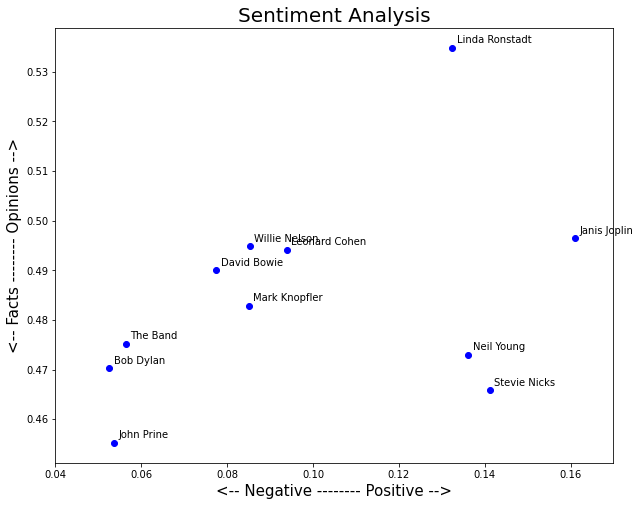

In [13]:
# plotting the results 

plt.rcParams['figure.figsize'] = [10, 8]

for index, musician in enumerate(data.index):
    x = data.polarity.loc[musician]
    y = data.subjectivity.loc[musician] 
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(0.04, .17)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.savefig('sentiment_analysis.png')
plt.show()

In [17]:
data.loc['bob_dylan']['lyrics']

'\'Twas a dark day in Dallas, November \'63\nA day that will live on in infamy\nPresident\u2005Kennedy\u2005was a-ridin\' high\nGood\u2005day to be livin\' and a\u2005good day to die\nBeing led to the slaughter like a sacrificial lamb\nHe said, "Wait a minute, boys, you know who I am?"\n"Of course we do, we know who you are"\nThen they blew off his head while he was still in the car\nShot down like a dog in broad daylight\nWas a matter of timing and the timing was right\nYou got unpaid debts, we\'ve come to collect\nWe\'re gonna kill you with hatred, without any respect\nWe\'ll mock you and shock you and we\'ll grin in your face\nWe\'ve already got someone here to take your place\nThe day they blew out the brains of the king\nThousands were watching, no one saw a thing\nIt happened so quickly, so quick, by surprise\nRight there in front of everyone\'s eyes\nGreatest magic trick ever under the sun\nPerfectly executed, skillfully done\nWolfman, oh Wolfman, oh Wolfman, howl\nRub-a-dub-dub

In [18]:
type(data.loc['bob_dylan']['lyrics'])

str

Load in data as songs to see how artists have changed over time? does this work? ie are songs in the right order? 